<a href="https://colab.research.google.com/github/Akshay-879/cs480student/blob/main/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

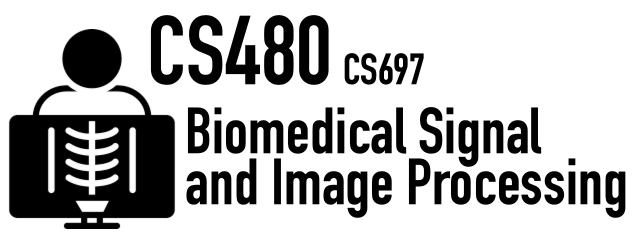
#Assignment 5

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.1 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: YOUR_ANSWER

# There are in total 220 slices.

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

# Coronal View

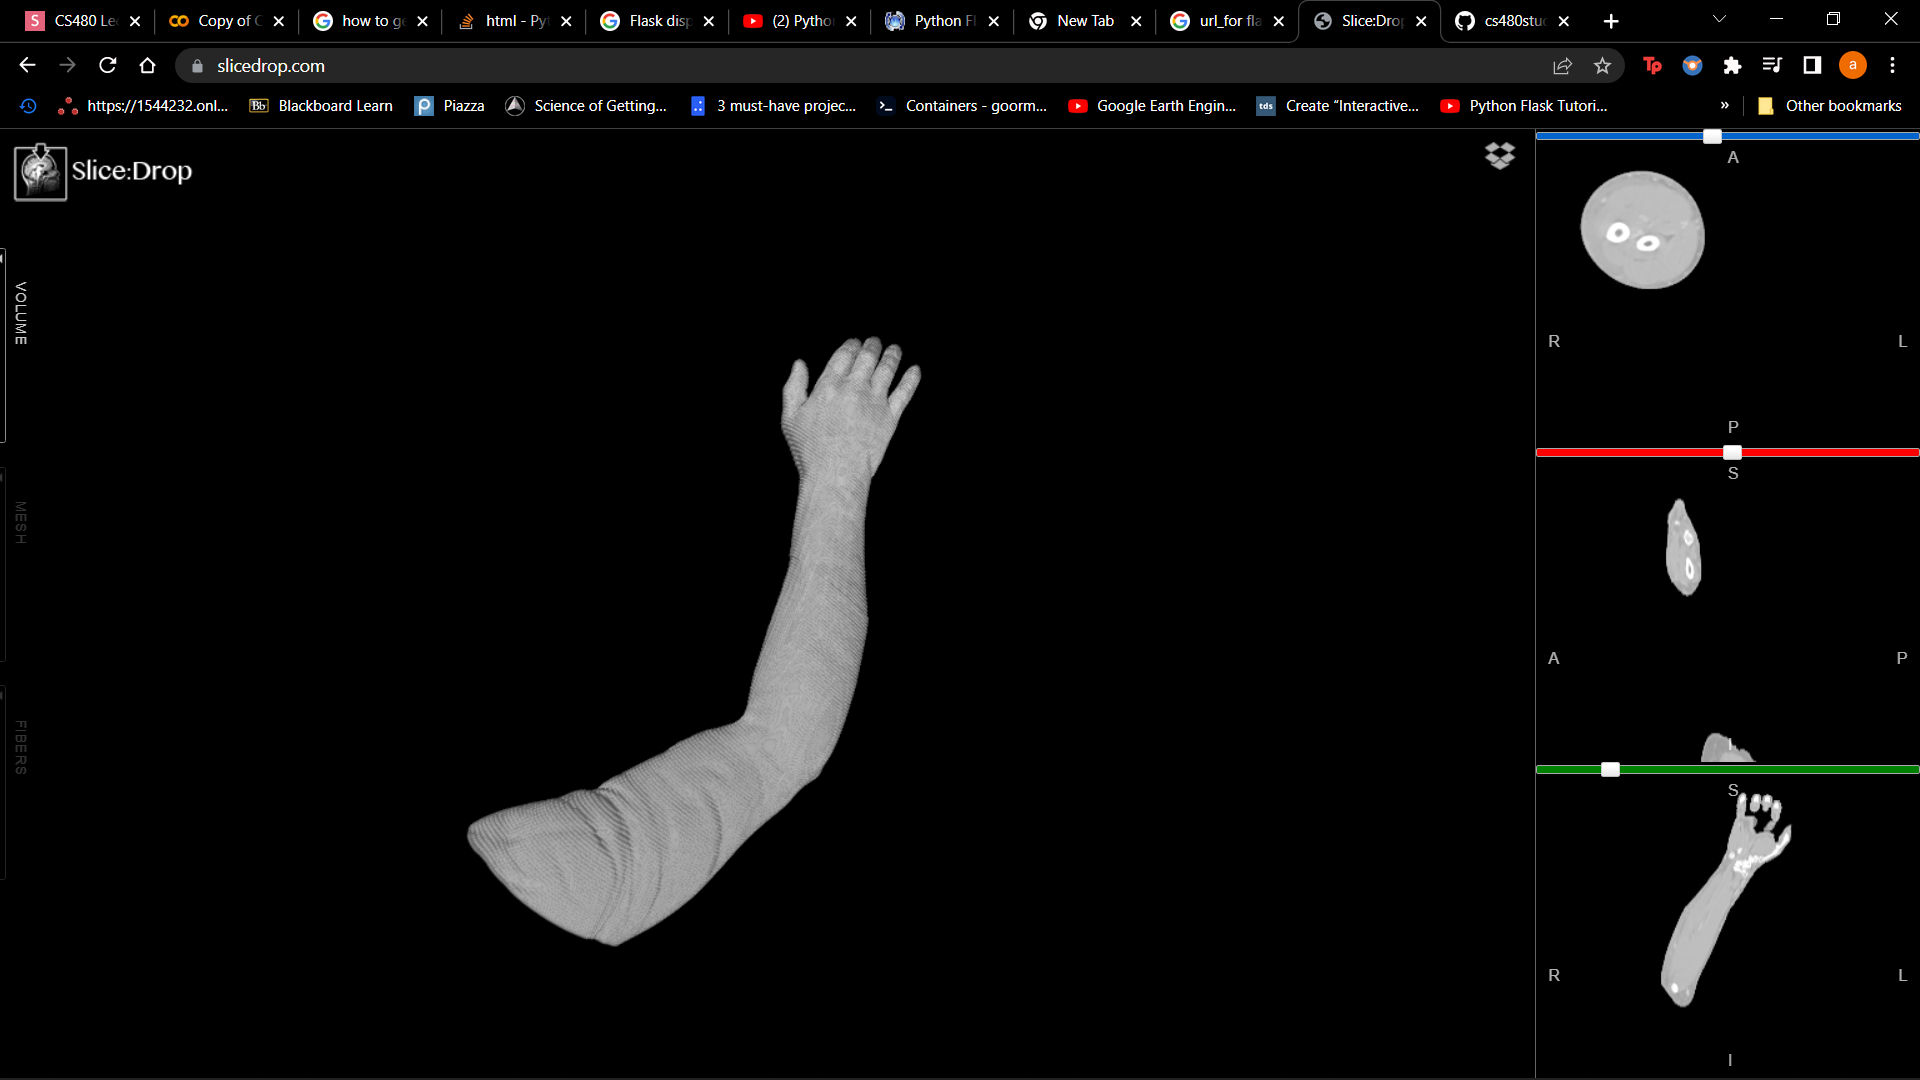

# Sagittal View

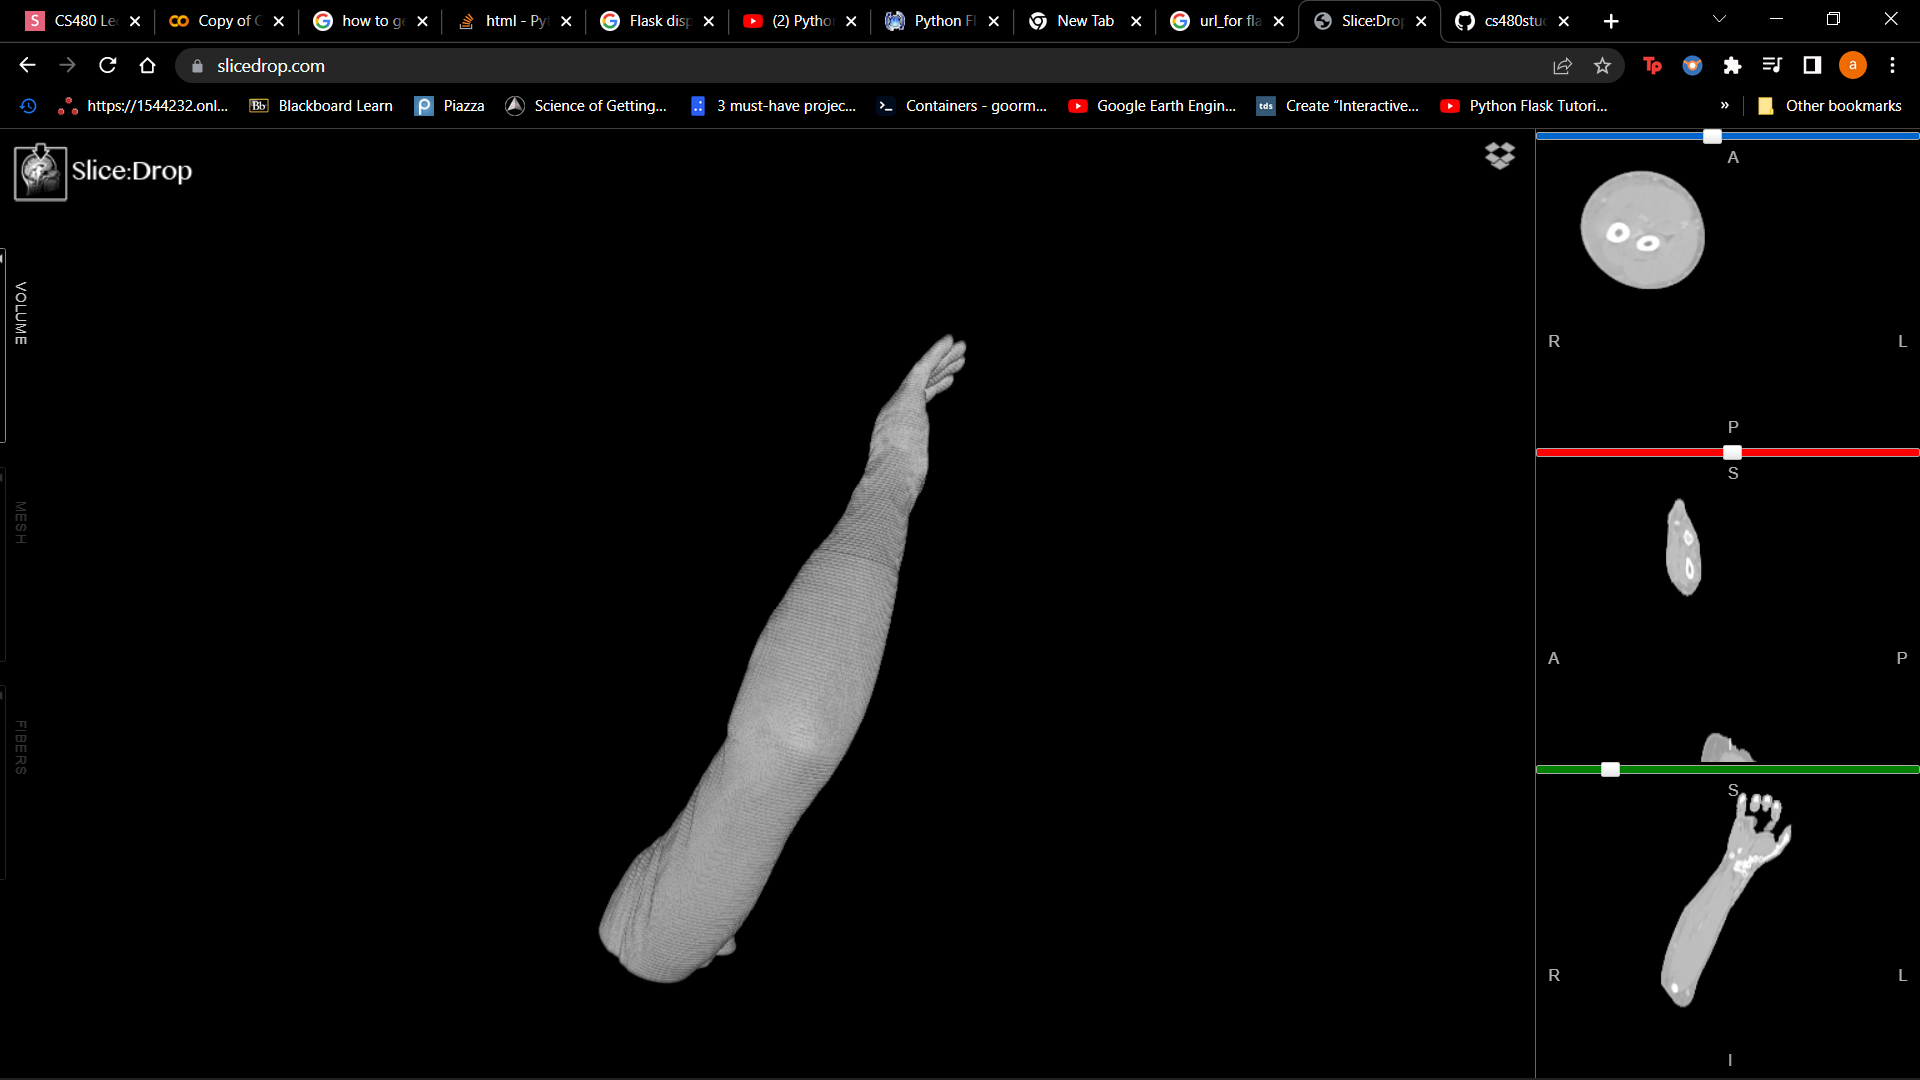

# Axial View

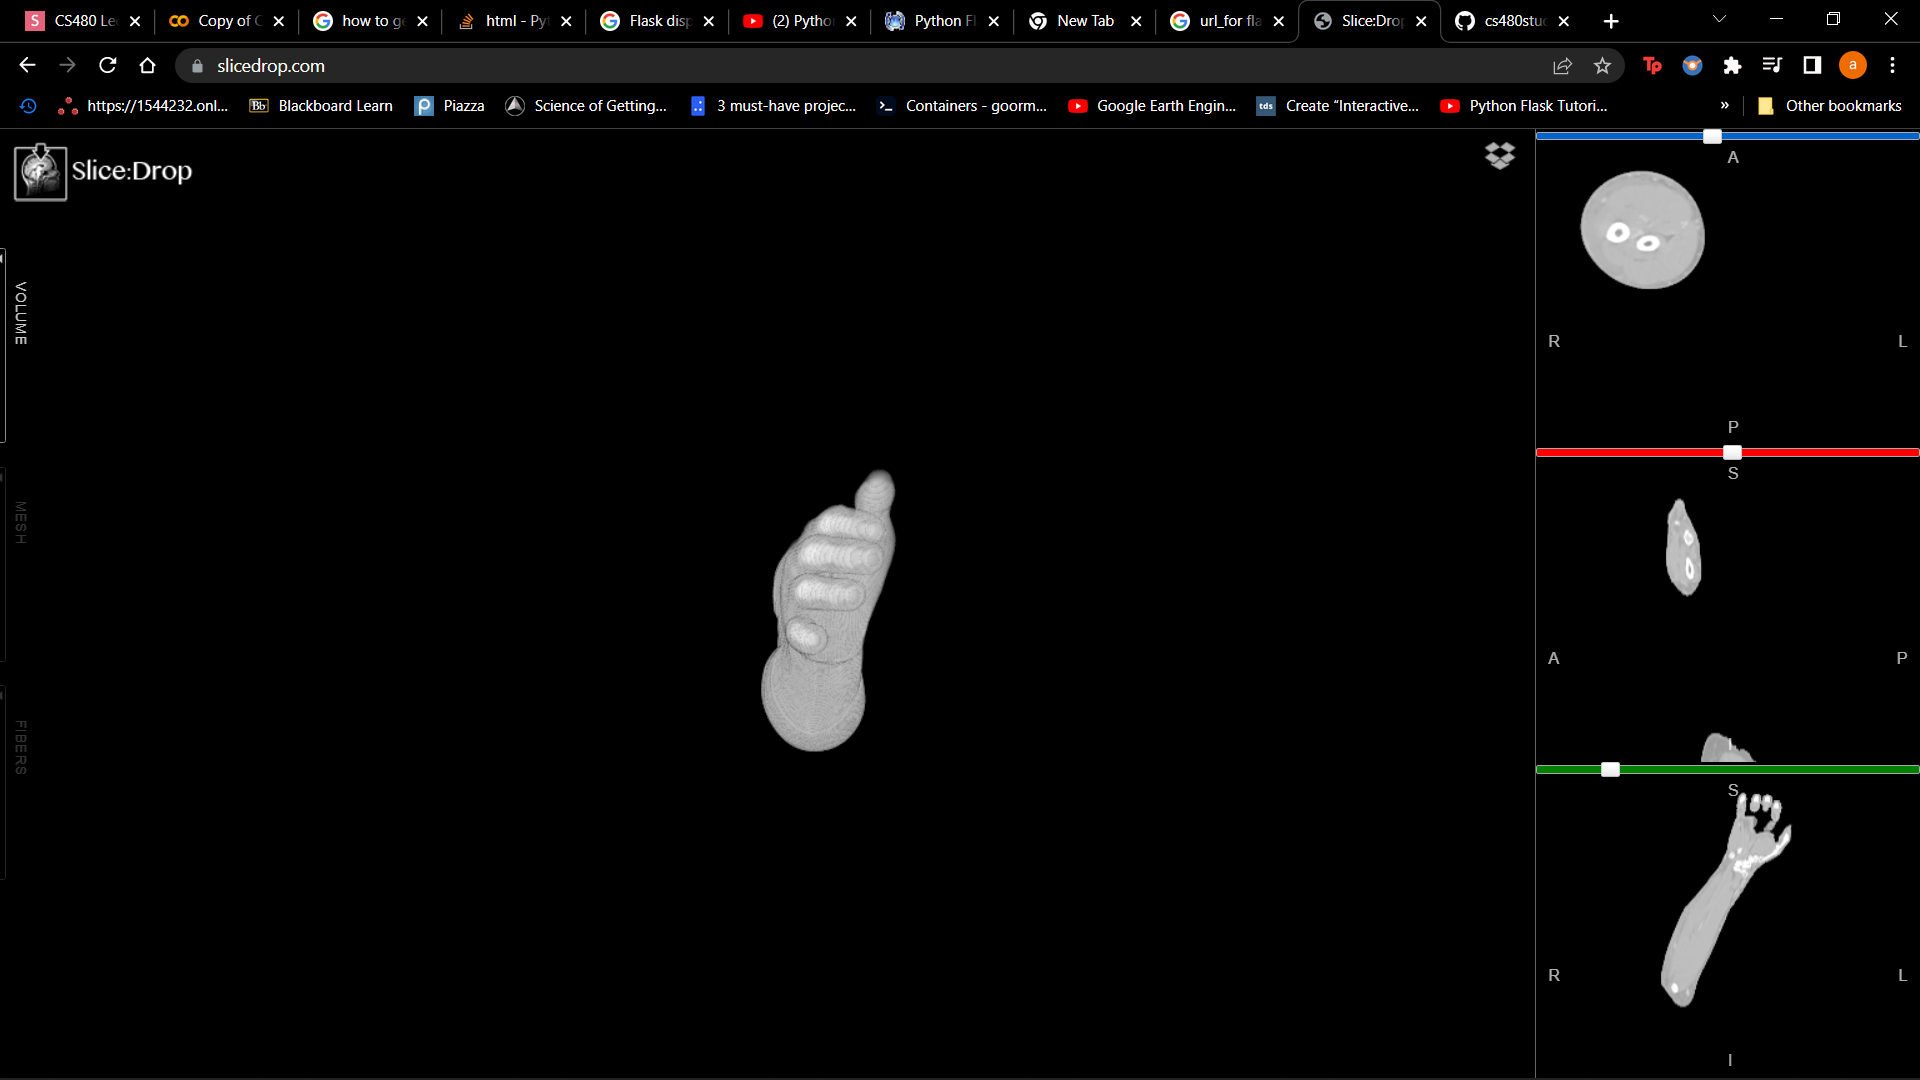

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [10]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [11]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [13]:
from pydicom import dcmread
import os

In [14]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [15]:
files = sorted(os.listdir('ct'))

slice_0 = dcmread('ct/'+files[0])

slice_0_shape = [i for i in slice_0.pixel_array.shape]
slice_0_shape.append(len(files))

image_3d = np.zeros(slice_0_shape, dtype=float)

for i in range(0, len(files)):  
  slice_array = dcmread('ct/'+files[i]).pixel_array
  image_3d[:,:,i] = slice_array

In [16]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [17]:
# TODO: YOUR CODE FOR AXIAL

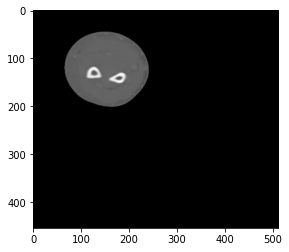

In [18]:
plt.imshow(image_3d[:, :, slice_0_shape[2]//2], cmap='gray')

In [19]:
# TODO: YOUR CODE FOR SAGITTAL

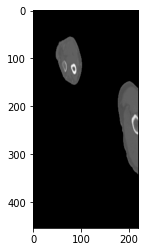

In [20]:
plt.imshow(image_3d[:, slice_0_shape[1]//2, :], cmap='gray')

In [21]:
# TODO: YOUR CODE FOR CORONAL

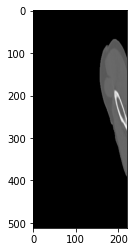

In [22]:
plt.imshow(image_3d[slice_0_shape[0]//2, :, :], cmap ='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [23]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [24]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [25]:
# TODO: YOUR CODE

(0028, 1050) Window Center                       DS: '30.0'
(0028, 1051) Window Width                        DS: '410.0'


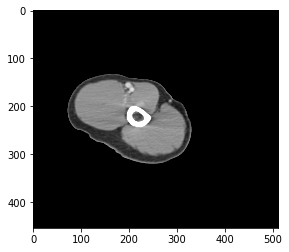

In [28]:
slice_n = dcmread('ct/'+ files[200])

level = slice_n['WindowCenter'].value
window = slice_n['WindowWidth'].value
rescale = slice_n['RescaleIntercept'].value
print(slice_n[0x0028, 0x1050])
print(slice_n[0x0028, 0x1051])
vmin = level - window/2
vmax = level + window/2
hu_pixels = slice_n.pixel_array
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

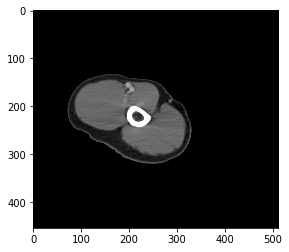

In [31]:
level = 100
window = 500
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

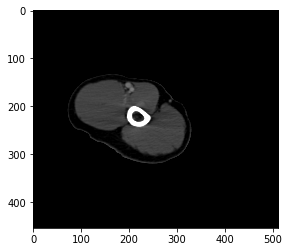

In [32]:
level = 200
window = 600
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

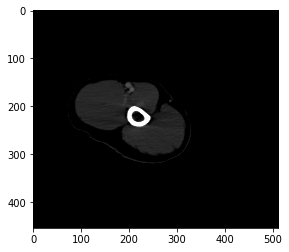

In [33]:
level = 300
window = 700
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

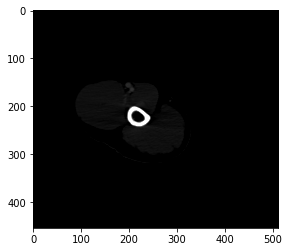

In [36]:
level = 500
window = 1000
vmin = level - window/2
vmax = level + window/2
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

Higher window and level values like 500 and 1000 respectively makes more sense and give clear pictures of the bones because the range for bones in hounsfield units is from 500 to 1000.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

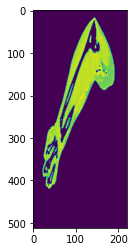

In [59]:
new_mask = image_3d[120].copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask > 1200] = 0
new_mask[new_mask < 900] = 0
plt.imshow(new_mask, )
plt.show()

In [46]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

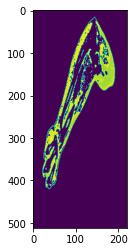

In [58]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask = image_3d[120].copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask > 1080] = 0
plt.imshow(new_mask)
plt.show()

In [48]:
# TODO: YOUR CODE TO SEGMENT BONES

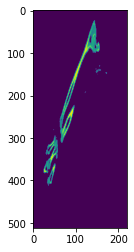

In [57]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask = image_3d[120].copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask < 1200] = 0
plt.imshow(new_mask)
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

The segmentations are satisfactory.

Refrences:
1. Pydicom documentation
2. stackoverflow.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""